In [2]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate a finer range of values for x (e.g., from 0 to 2*pi)
# x = np.linspace(0, 2 * np.pi, 1000)  # 1000 points between 0 and 2*pi
# y = np.sin(x)

# # Create the plot
# plt.plot(x, y, color='b', label='sin(x)')
# plt.xlabel('x')
# plt.ylabel('sin(x)')
# plt.title('Smooth Sine Curve')
# plt.grid(True)
# plt.legend()
# plt.show()

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(0)

In [4]:
print("Python:",sys.version)

Python: 3.13.3 (main, Jun  5 2025, 21:12:24) [GCC 13.3.0]


In [5]:
# sample inputs, weights & biases:

X = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases = [2,3,0.5]

In [6]:
layer_outputs = [] # output of a current layer

# for neuron_weights, neuron_bias in zip(weights, biases):
#     neuron_output = 0
#     for n_input, weight in zip(inputs, neuron_weights):
#         neuron_output += n_input*weight
#     neuron_output += neuron_bias
#     layer_outputs.append(neuron_output)
# print(layer_outputs)

# OR using np.dot

# output = np.dot(inputs, np.array(weights).T) + biases
# print(output)

In [7]:
# # # ReLU:

# # inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

# output = []

# # for i in inputs:
# #     if i >= 0:
# #         output.append(i)
# #     elif i <= 0:
# #         output.append(0)

# # OR:
# for i in inputs:
#     output.append(max(i, 0))

# print(output)

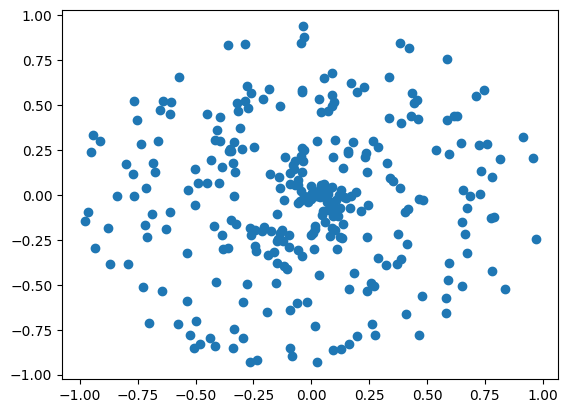

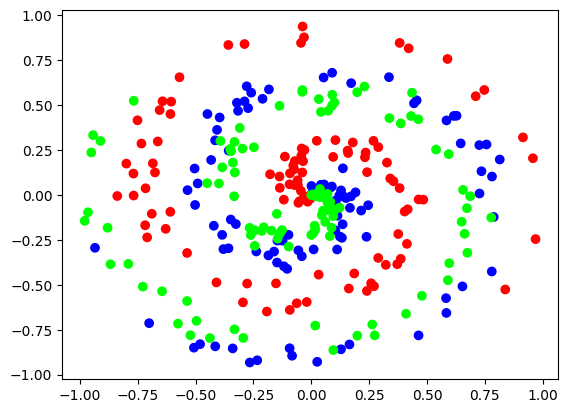

In [8]:
# generating dataset:

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) +np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

# generate data:
X, y = create_data(100, 3)

plt.scatter(X[:,0], X[:, 1])
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [9]:
# neural net:

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons)) # <-- the shape is passed as an argumanet
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [10]:
layer1 = Layer_Dense(2,5)
layer1.forward(X)
activation1 = Activation_ReLU()
activation1.forward(layer1.output)

In [ ]:
# Softmax (exp of each element the  each elem / sum):
layer_outputs = [[4.8, 1.21, 2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)

[[ 135.72296484]
 [7333.35859605]
 [   7.98280655]]


In [12]:
e = math.e
layer_output = [4.8, 1.21, 2.385]

# exp_values = [e**output for output in layer_output]

exp_values = np.exp(layer_output)

norm_values = exp_values / np.sum(exp_values)

In [ ]:
# Input -> Exp -> Normalize -> Output
# Exp -> Normalize => Softmax

# Exploding exponents problem:
layer_outputs = [[1234, 1200, 1250],
                [1450, 1490, 1390],
                [1300, 1280, 1350]]

print(np.exp(layer_outputs))

# ways to handle exploding exponents:
# 1. Subtract max from each row before exp
# 2. Use log-softmax
max_values = np.max(layer_outputs, axis=1, keepdims=True)
print("="*50)
print(max_values)

satble_outputs = layer_outputs - max_values
print("="*50)
print(satble_outputs)

# Now make exp and normalize:
exp_values = np.exp(satble_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print("="*50)
print(norm_values)

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
[[1250]
 [1490]
 [1350]]
[[ -16  -50    0]
 [ -40    0 -100]
 [ -50  -70    0]]
[[1.12535162e-07 1.92874963e-22 9.99999887e-01]
 [4.24835426e-18 1.00000000e+00 3.72007598e-44]
 [1.92874985e-22 3.97544974e-31 1.00000000e+00]]


/tmp/ipykernel_2674034/1637793290.py:9: RuntimeWarning: overflow encountered in exp
  print(np.exp(layer_outputs))


In [ ]:
# The Loss Function:
# Categorical Cross Entropy:

# What does log solves?
"""Solves for x in  e ** x = b, here you've b"""
# ex:
# b = 5.2
# print(np.log(b))

# print(math.e ** np.log(b))

# suppose we have 3 cateogory outputs:
# in one hote encoding:
# say we have

softmax_output = [0.7, 0.1, 0.2]
target_output = [1, 0, 0]  # class 0 is the correct class

loss = -(math.log(softmax_output[0]) * target_output[0] +
        math.log(softmax_output[1]) * target_output[1] +
        math.log(softmax_output[2]) * target_output[2])

print(loss)

-0.35667494393873245


In [15]:
# Suppose softmax_outputs are:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                     [0.1, 0.5, 0.4],
                     [0.02, 0.9, 0.08]])

# suppose target outputs are:
# the below means from softmax_outputs above, the correct indices to pick are
# 0, 1, 1
class_targets = [0, 1, 1]  # correct classes for each sample

# to pick the correct probabilities:
# this will pck up the sofmax outputs at indices 0,1,1 for each row
print(softmax_outputs[[0,1,2], class_targets])
print("="*30)
print("will give same result")

#  Instead of hardcoding the lenght of softmax_outputs array, we can use:
print(softmax_outputs[np.arange(len(softmax_outputs)), class_targets])

# negative log
print("nll is:")
print(-np.log(softmax_outputs[np.arange(len(softmax_outputs)), class_targets]))

# the mean of this will give the final loss:
print("final loss is:")
print(np.mean(-np.log(softmax_outputs[np.arange(len(softmax_outputs)), class_targets])))

# suppose one value in softmax_outputs is 0:
# this will give inf loss due to log(0) being undefined.
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                     [0.0, 0.5, 0.5],
                     [0.02, 0.9, 0.08]])
class_targets = [0, 0, 1]
print("final loss with 0 prob is:")
print(np.mean(-np.log(softmax_outputs[np.arange(len(softmax_outputs)), class_targets])))

[0.7 0.5 0.9]
will give same result
[0.7 0.5 0.9]
nll is:
[0.35667494 0.69314718 0.10536052]
final loss is:
0.38506088005216804
final loss with 0 prob is:
inf


/tmp/ipykernel_422945/1216923900.py:35: RuntimeWarning: divide by zero encountered in log
  print(np.mean(-np.log(softmax_outputs[np.arange(len(softmax_outputs)), class_targets])))


In [19]:
# Suppose class_targets = [0, 1, 1] is one hot encoded instead of sparse:
# like class_targets = [[1,0,0], [0,1,0], [0,1,0]]
# then to pick the correct probabilities from:

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                     [0.1, 0.5, 0.4],
                     [0.02, 0.9, 0.08]])

# we do:
one_hot_targets = np.array([[1,0,0],
                             [0,1,0],
                             [0,1,0]])
print("one hot encoded targets:")
print(softmax_outputs * one_hot_targets)  # element wise multiplication
# now summing along axis=1 will give the correct probs:
correct_probs = np.sum(softmax_outputs * one_hot_targets, axis=1)
print("correct probs from one hot encoded targets:")
print(correct_probs)
# final loss:
print("final loss from one hot encoded targets:")
print(np.mean(-np.log(correct_probs)))

one hot encoded targets:
[[0.7 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.9 0. ]]
correct probs from one hot encoded targets:
[0.7 0.5 0.9]
final loss from one hot encoded targets:
0.38506088005216804
